In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
from fastai.vision import *
from fastai import *
from fastai.metrics import error_rate
import pandas as pd
import torch

In [11]:
path ="../input/"
train_df=pd.read_csv(path+"train.csv")
test_df=pd.read_csv(path+"sample_submission.csv")

In [12]:
bs = 128
data = ImageDataBunch.from_csv(path=path, folder='train/train', csv_labels='train.csv', ds_tfms=get_transforms(), size=32, bs=bs).normalize(imagenet_stats)

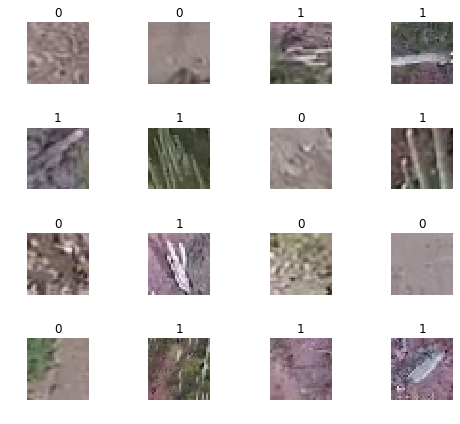

In [13]:
data.show_batch(rows=4, figsize=(7,6))

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

([0, 1], 2, 14000, 3500)

In [15]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, model_dir="/tmp/model/")

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.253469,0.126851,0.048857,00:30
1,0.137416,0.084497,0.033429,00:31
2,0.095156,0.079836,0.028857,00:30
3,0.078681,0.064256,0.024286,00:31


In [17]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.076821,0.071793,0.028857,00:30
1,0.061822,0.042101,0.015143,00:31


In [18]:
learn.save('stage-1')

In [19]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


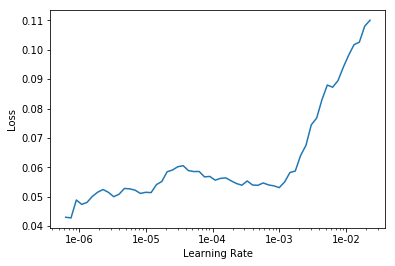

In [20]:
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(5, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.047594,0.025515,0.010571,00:31
1,0.036301,0.018296,0.006000,00:31
2,0.027372,0.017683,0.006000,00:31
3,0.013840,0.023346,0.006857,00:31
4,0.009609,0.012671,0.004571,00:31


In [23]:
interp = ClassificationInterpretation.from_learner(learn)

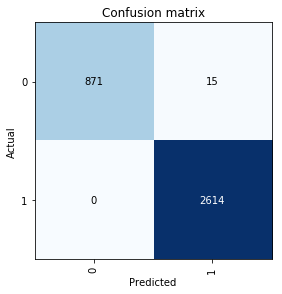

In [24]:
interp.plot_confusion_matrix()

In [25]:
def pred(name):
    a,b,c=learn.predict(open_image("../input/test/test/"+name))
    return c[1].numpy()

In [27]:
test_df["has_cactus"]=test_df["id"].apply(lambda x:pred(x))

In [28]:
test_df.to_csv('submission.csv',index=False)